In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)

## Scrapping Data from Website

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

# Get information of the second <table>
table = soup.find_all('table')[0]

# Extract <th> for the columns
world_titles = table.find_all('th')

# Clean up columns and set as dataframe 
table_titles = [title.text.strip() for title in world_titles]

df = pd.DataFrame(columns = table_titles)

# Extract <th> for column data
column_data = table.find_all('tr')

# Set data points to the column they belong
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data
    
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


## Data Processing

### Remove specific characters from columns 'Revenue (USD millions)', 'Revenue growth' and 'Employees'. Change data type

In [5]:
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(float)
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '').astype(float)
df['Employees'] = df['Employees'].str.replace('[^0-9]', '', regex=True).astype(int)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125.0,6.0,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785.0,11.9,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482.0,-2.8,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622.0,14.6,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7,396500,"Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45735.0,11.8,16023,"New York City, New York"
96,97,CHS,Agriculture cooperative,45590.0,-4.6,10609,"Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006.0,-2.5,34100,"New York City, New York"
98,99,Dow Chemical Company,Chemical industry,44622.0,-21.6,35900,"Midland, Michigan"


### Expand column 'Headquarters' to two columns ('City' and 'State'), separated by ','

In [6]:
df[['City', 'State']] = df['Headquarters'].str.split(pat=',', n=1, expand=True)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State
0,1,Walmart,Retail,648125.0,6.0,2100000,"Bentonville, Arkansas",Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,574785.0,11.9,1525000,"Seattle, Washington",Seattle,Washington
2,3,Apple,Electronics industry,383482.0,-2.8,161000,"Cupertino, California",Cupertino,California
3,4,UnitedHealth Group,Healthcare,371622.0,14.6,440000,"Minnetonka, Minnesota",Minnetonka,Minnesota
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7,396500,"Omaha, Nebraska",Omaha,Nebraska
...,...,...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45735.0,11.8,16023,"New York City, New York",New York City,New York
96,97,CHS,Agriculture cooperative,45590.0,-4.6,10609,"Inver Grove Heights, Minnesota",Inver Grove Heights,Minnesota
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006.0,-2.5,34100,"New York City, New York",New York City,New York
98,99,Dow Chemical Company,Chemical industry,44622.0,-21.6,35900,"Midland, Michigan",Midland,Michigan


### Determine unique values in each column

In [8]:
df.nunique()

Rank                      100
Name                      100
Industry                   37
Revenue (USD millions)     98
Revenue growth             96
Employees                  98
Headquarters               72
City                       72
State                      28
dtype: int64

In [9]:
df.sort_values(by = 'Revenue (USD millions)', ascending = True).head(10)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,City,State
99,100,Best Buy,Retail,43452.0,-6.1,85000,"Richfield, Minnesota",Richfield,Minnesota
98,99,Dow Chemical Company,Chemical industry,44622.0,-21.6,35900,"Midland, Michigan",Midland,Michigan
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006.0,-2.5,34100,"New York City, New York",New York City,New York
96,97,CHS,Agriculture cooperative,45590.0,-4.6,10609,"Inver Grove Heights, Minnesota",Inver Grove Heights,Minnesota
95,96,TIAA,Financials,45735.0,11.8,16023,"New York City, New York",New York City,New York
94,95,Coca-Cola,Beverage,45754.0,6.4,79100,"Atlanta, Georgia",Atlanta,Georgia
93,94,AIG,Insurance,46802.0,-17.1,25200,"New York City, New York",New York City,New York
92,93,World Kinect Corporation,Energy trading,47711.0,-19.2,5289,"Doral, Florida",Doral,Florida
91,92,Plains All American Pipeline,Petroleum industry,48712.0,-15.1,4200,"Houston, Texas",Houston,Texas
90,91,Capital One Financial,Financials,49484.0,29.0,51987,"Richmond, Virginia",Richmond,Virginia


### Data Aggregation and Visualization

### Return tables to show the top 10 companies by Revenue and Revenue growth respectively

In [10]:
df[['Name', 'Industry', 'Revenue (USD millions)']].sort_values(by = 'Revenue (USD millions)', ascending = False).head(10)

,Name,Industry,Revenue (USD millions)
0,Walmart,Retail,648125.0
1,Amazon,Retail and cloud computing,574785.0
2,Apple,Electronics industry,383482.0
3,UnitedHealth Group,Healthcare,371622.0
4,Berkshire Hathaway,Conglomerate,364482.0
5,CVS Health,Healthcare,357776.0
6,ExxonMobil,Petroleum industry,344582.0
7,Alphabet,Technology and cloud computing,307394.0
8,McKesson Corporation,Health,276711.0
9,Cencora,Pharmacy wholesale,262173.0


In [11]:
df[['Name', 'Industry', 'Revenue growth']].sort_values(by = 'Revenue growth', ascending = False).head(10)

,Name,Industry,Revenue growth
64,Nvidia,Technology,125.9
34,Goldman Sachs,Financials,57.8
20,Citigroup,Financials,55.1
11,JPMorgan Chase,Financial services,54.7
17,Bank of America,Financials,49.4
40,Morgan Stanley,Financials,45.9
33,Wells Fargo,Financials,39.2
90,Capital One Financial,Financials,29.0
61,Progressive Corporation,Insurance,25.2
35,Freddie Mac,Financials,24.6


### Create bar charts to display top 10 companies by revenue and revenue growth.

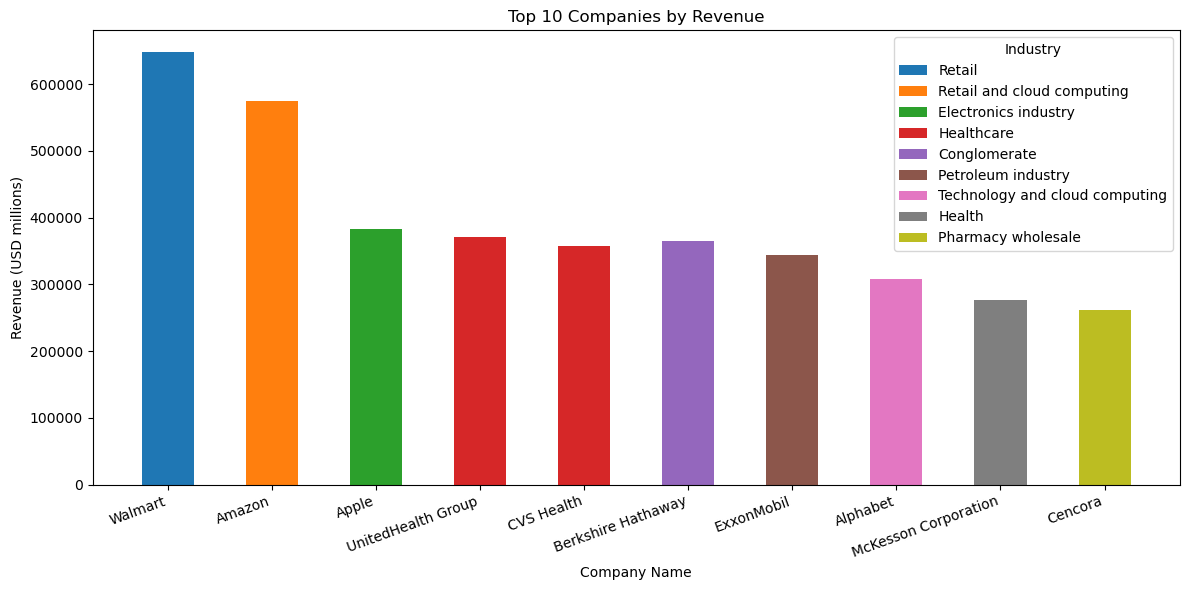

In [12]:
top_10_companies = df[['Name', 'Industry', 'Revenue (USD millions)']].sort_values(by="Revenue (USD millions)", ascending=False).head(10)

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create a clustered column chart
for i, industry in enumerate(top_10_companies['Industry'].unique()):
    # Filter data by industry
    subset = top_10_companies[top_10_companies['Industry'] == industry]
    
    # Plot each industry's data with a distinct color and position
    plt.bar(subset['Name'], subset['Revenue (USD millions)'], label=industry, width=0.5, align='center')

# Add labels and title
plt.xlabel('Company Name')
plt.ylabel('Revenue (USD millions)')
plt.title('Top 10 Companies by Revenue')
plt.xticks(rotation=20, ha='right')

# Add a legend
plt.legend(title="Industry")

plt.savefig('top_10_companies.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()

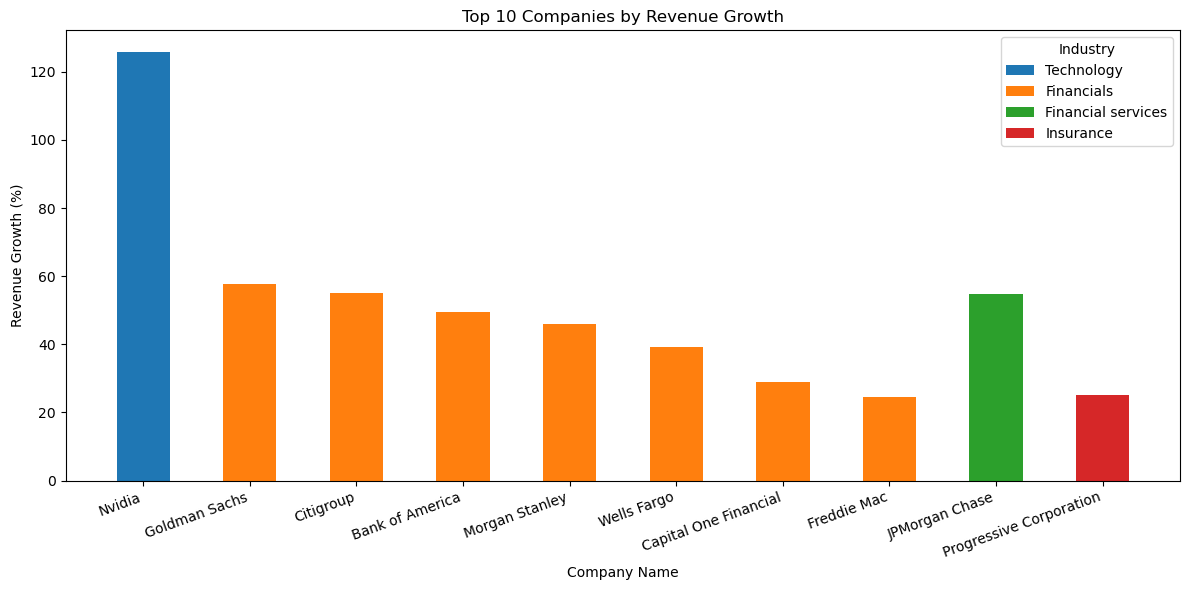

In [13]:
top_10_growth_companies = df[['Name', 'Industry', 'Revenue growth']].sort_values(by='Revenue growth', ascending=False).head(10)

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create a clustered column chart
for i, industry in enumerate(top_10_growth_companies['Industry'].unique()):
    # Filter data by industry
    subset = top_10_growth_companies[top_10_growth_companies['Industry'] == industry]
    
    # Plot each industry's data with a distinct color and position
    plt.bar(subset['Name'], subset['Revenue growth'], label=industry, width=0.5, align='center')

# Add labels and title
plt.xlabel('Company Name')
plt.ylabel('Revenue Growth (%)')
plt.title('Top 10 Companies by Revenue Growth')
plt.xticks(rotation=20, ha='right')

# Add a legend
plt.legend(title="Industry")

plt.savefig('top_10_growth_companies.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()

### Create a box plot to visualize the distribution of revenue across all 100 companies.

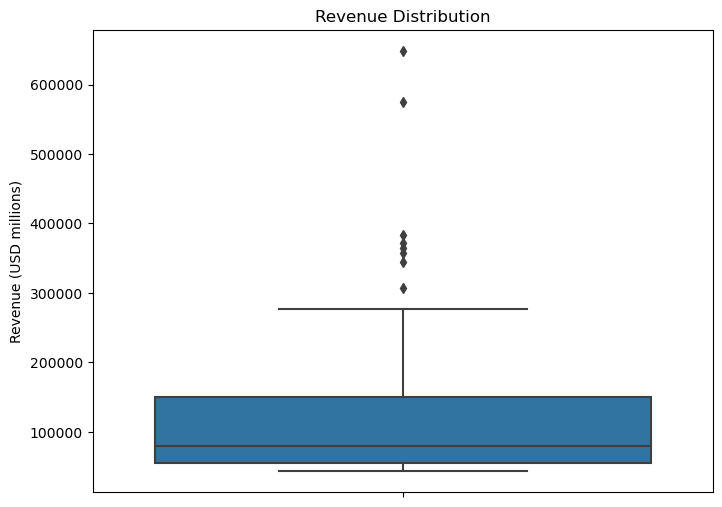

In [14]:
revenue_distribution = df['Revenue (USD millions)']

# Set the figure size for better readability
plt.figure(figsize=(8, 6))

# Create a box plot
sns.boxplot(y=revenue_distribution)

# Add labels and title
plt.title('Revenue Distribution')
plt.ylabel('Revenue (USD millions)')

plt.savefig('revenue_distribution.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


### Create a combination chart to illustrate total revenue generated by each industry and their corresponding average revenue growth.

In [15]:
industry_revenue = df.groupby('Industry')['Revenue (USD millions)'].sum()
industry_revenue

Industry
Aerospace and defense             145365.0
Agriculture cooperative            45590.0
Agriculture manufacturing          61251.0
Airline                           164553.0
Apparel                            51217.0
                                    ...   
Technology                        442149.0
Technology and cloud computing    581169.0
Telecom hardware manufacturing     56998.0
Telecommunications                310153.0
Transportation                    181113.0
Name: Revenue (USD millions), Length: 37, dtype: float64

In [16]:
# Group by Industry and calculate the mean of Revenue Growth
industry_growth = df.groupby('Industry')['Revenue growth'].mean()

industry_growth

Industry
Aerospace and defense              9.600000
Agriculture cooperative           -4.600000
Agriculture manufacturing         16.500000
Airline                           14.033333
Apparel                            9.600000
                                    ...    
Technology                        19.533333
Technology and cloud computing    -0.233333
Telecom hardware manufacturing    10.600000
Telecommunications                -0.300000
Transportation                    -6.450000
Name: Revenue growth, Length: 37, dtype: float64

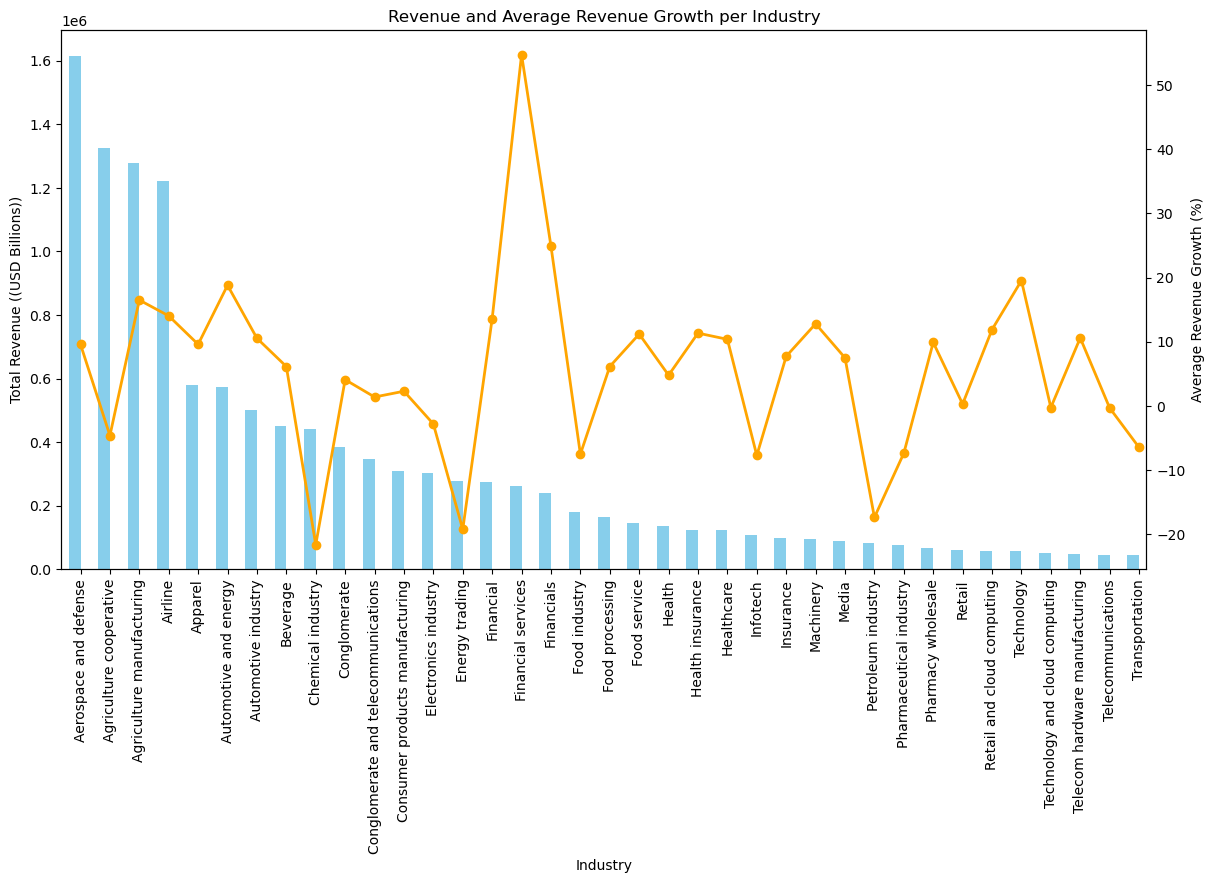

In [17]:
# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for total revenue per industry
industry_revenue.sort_values(ascending=False).plot(kind='bar', color='skyblue', ax=ax1, position=1, width=0.4)
ax1.set_ylabel('Total Revenue ((USD Billions))')
ax1.set_xlabel('Industry')

# Create a second y-axis for the line plot
ax2 = ax1.twinx()

# Line plot for average revenue growth per industry
industry_growth.plot(kind='line', marker='o', color='orange', ax=ax2, linewidth=2)
ax2.set_ylabel('Average Revenue Growth (%)')

plt.title('Revenue and Average Revenue Growth per Industry')

plt.savefig('revenue_revnuegrowth.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

### Create a scatter plot to examine the correlation between revenue and number of employees, or to assess the impact of workforce size on total revenue.

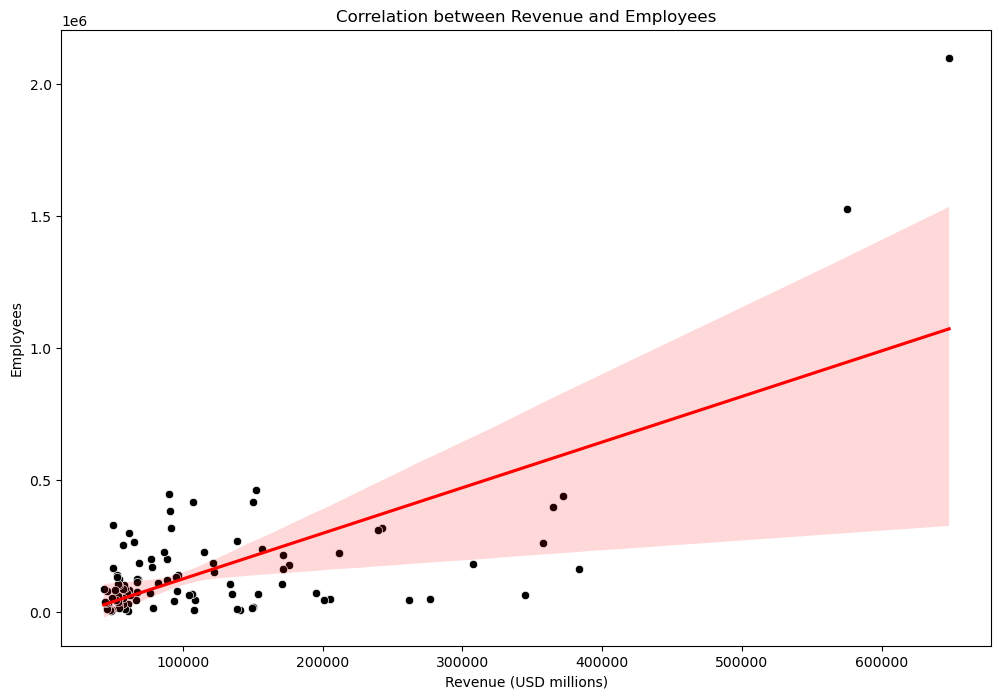

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Revenue (USD millions)', y='Employees', color='black')
sns.regplot(data=df, x='Revenue (USD millions)', y='Employees', scatter=False, color='red')
plt.title('Correlation between Revenue and Employees')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Employees')
plt.grid(False)

plt.savefig('revenue_employees_correlation.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

### Create an area chart to visualize the distribution of the top 100 companies by revenue across different states based on the provided data.

In [21]:
state_counts = df.groupby('State')['State'].count().sort_values(ascending=False)

state_counts

State
 New York                 15
 Texas                    14
 California               10
 Illinois                  7
 Ohio                      6
                          ..
 Idaho                     1
 D.C.                      1
 Oregon                    1
 Rhode Island              1
 Cook County, Illinois     1
Name: State, Length: 28, dtype: int64

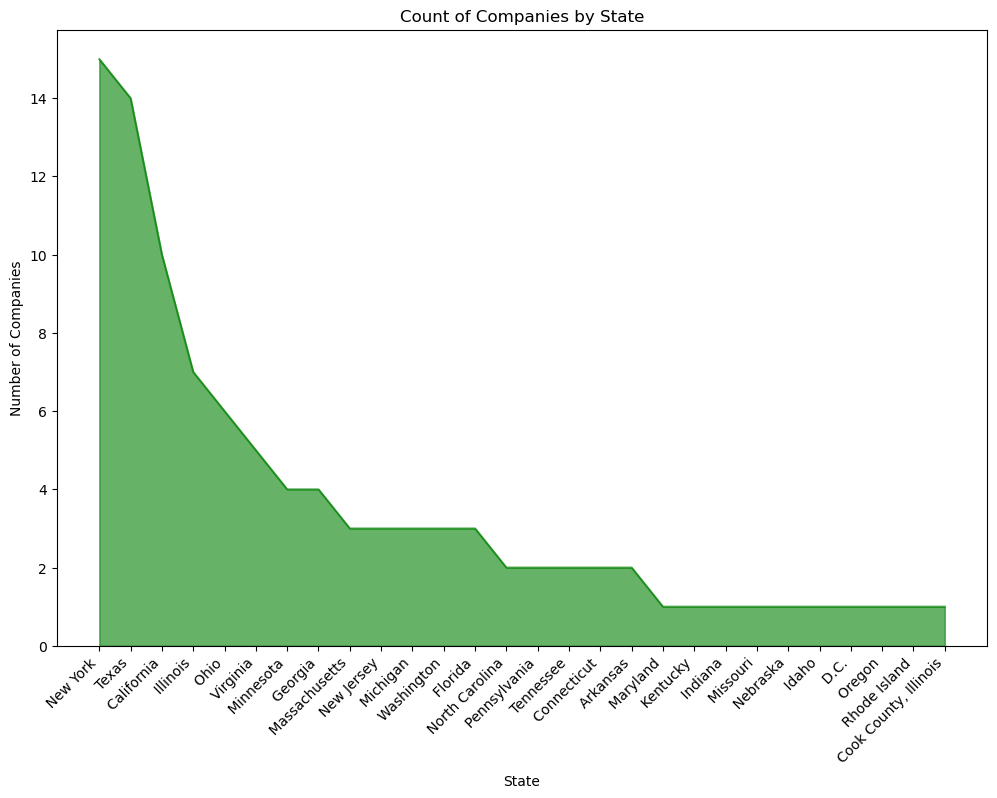

In [25]:
plt.figure(figsize=(12, 8))
state_counts.plot(kind='area', alpha=0.6, color='green')
plt.title('Count of Companies by State')
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.xticks(ticks=range(len(state_counts)), labels=state_counts.index, rotation=45, ha='right')
plt.grid(False)

plt.savefig('companies_by_state.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

### Create a bar chart to visualize the total revenue generated by top 100 companies in each state

In [23]:
revenue_state = df.groupby('State')['Revenue (USD millions)'].sum().sort_values(ascending=False)

revenue_state

State
 Texas                    1632464.0
 California               1456831.0
 New York                 1333643.0
 Washington               1028990.0
 Ohio                      704082.0
                            ...    
 Kentucky                  106374.0
 Idaho                      77650.0
 Maryland                   67571.0
 Cook County, Illinois      57094.0
 Oregon                     51217.0
Name: Revenue (USD millions), Length: 28, dtype: float64

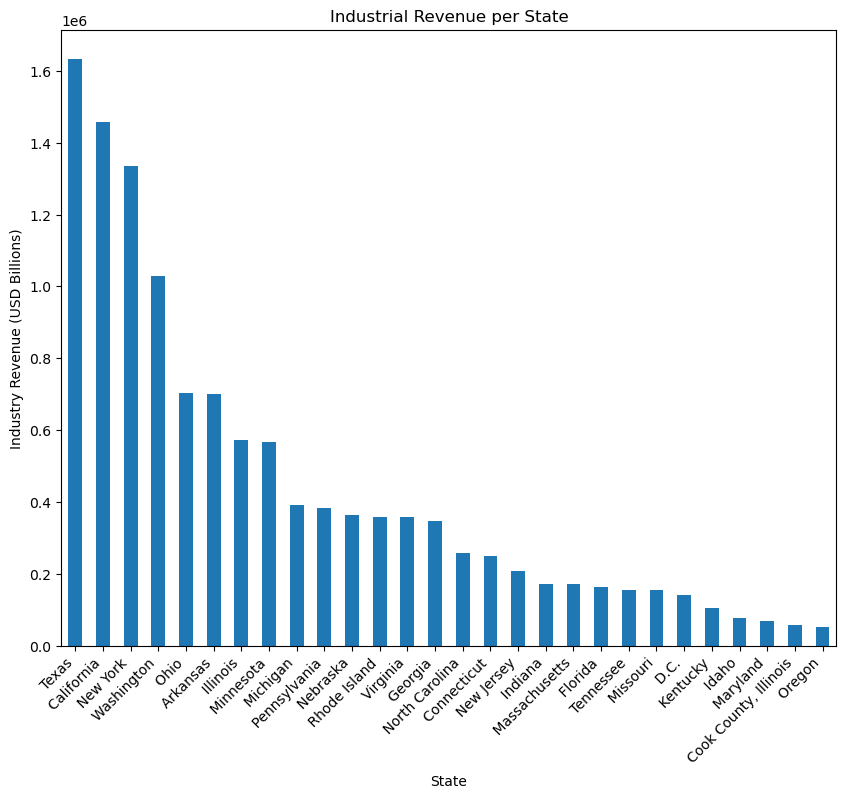

In [24]:
# Plot the bar chart
plt.figure(figsize=(10, 8))
revenue_state.plot(kind='bar')
plt.title('Industrial Revenue per State')
plt.xlabel('State')
plt.ylabel('Industry Revenue (USD Billions)')
plt.xticks(rotation=45, ha='right')

plt.savefig('industrial_revenue_state.png', format='png', dpi=300, bbox_inches='tight')

plt.show()